# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Matplotlib](#Section-1)
- [Section 2 &ndash; Moving Beyond Static Visualizations](#Section-2)
- [Section 3 &ndash; Building Interactive Visualizations for Data Exploration](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Using the data in `weather.csv`, plot the daily average temperature (`TAVG`) for both LA and NYC. Fill in all sections where NYC's daily average temperature was higher than LA's in 2020.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from utils import despine
from matplotlib import ticker
weather = pd.read_csv('../data/weather.csv',date_format=True, index_col='date')

In [31]:
weather

,city,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
date,,,,,,,
2020-01-01,Atlanta,7.2,0.00,0.0,45.0,57.0,36.0
2020-01-01,Boston,15.4,0.00,0.0,39.0,43.0,36.0
2020-01-01,Chicago,11.9,0.00,0.0,28.0,42.0,21.0
2020-01-01,Honolulu,6.3,0.00,NaN,76.0,81.0,68.0
2020-01-01,Houston,6.5,0.10,0.0,52.0,60.0,47.0
...,...,...,...,...,...,...,...
2020-12-31,Miami,16.6,0.00,NaN,76.0,81.0,73.0
2020-12-31,NYC,10.7,0.53,0.0,46.0,50.0,38.0
2020-12-31,Phoenix,5.1,0.00,NaN,51.0,60.0,41.0


In [38]:
date = weather.loc[weather.city == 'NYC'].index

In [43]:
dates = mdates.date2num(date)

In [32]:
NYC_TAVG = weather.loc[weather.city == 'NYC'].TAVG

In [33]:
LA_TAVG = weather.loc[weather.city == 'LA'].TAVG

In [86]:
def format_axes(ax):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    return ax

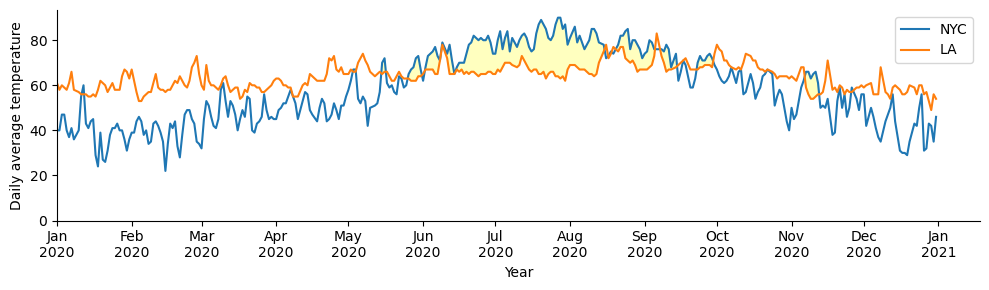

In [92]:
fig, ax = plt.subplots(figsize = (10,3))
ax.plot(dates, NYC_TAVG, label = 'NYC')
ax.plot(dates, LA_TAVG, label = 'LA')

ax.fill_between(dates, NYC_TAVG, LA_TAVG, where=(NYC_TAVG > LA_TAVG), 
                interpolate=True, alpha = 0.25, color='yellow')
ax.set(xlabel='Year',
      ylabel='Daily average temperature',
      xlim=(dates[0], None),ylim=(0,None)
      )
ax.legend()
despine(ax)
format_axes(ax)
plt.tight_layout()

#### Exercise 1.2
##### Using the data in `weather.csv`, make a vertical bar plot showing total monthly precipitation (`PRCP`) in Seattle. Annotate the bars.

#### Exercise 1.3
##### Using the data in `weather.csv`, create a stacked horizontal bar plot of total precipitation per city per quarter (each city will have four segments &ndash; one for the total precipitation in each quarter of the year). Add a vertical line at Seattle's total precipitation.

#### Exercise 1.4
##### Using the data in `weather.csv`, generate histograms for the daily average wind (`AWND`) in each of the cities. Make sure to use subplots that share both the x- and y-axis.

---

### Section 2

#### Exercise 2.1

##### Modify the animation of daily subway entries to show both the weekday and weekend histograms on the same subplot (you only need one now). Don't forget to change the transparency of the bars to be able to visualize the overlap.

#### Exercise 2.2

##### Modify the earthquake animation to show earthquakes per day in April 2020.

---

### Section 3

#### Exercise 3.1

##### Using hvPlot, make histograms of earthquake magnitude (`mag`) for each magnitude type (`magType`) with a dropdown to select the magnitude type.

#### Exercise 3.2

##### Use hvPlot to create a line plot of total earthquakes per day. Add custom tooltips using Bokeh's `HoverTool`.